<a href="https://colab.research.google.com/github/2002hk/HumanAI_ISSR3_test/blob/main/sentiment_classification_of_reddit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
!pip install nltk pandas vaderSentiment textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 9.6 MB/s eta 0:00:00


In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk

In [4]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
df=pd.read_csv("/content/reddit_cleaned_data (1).csv")

In [6]:
sia=SentimentIntensityAnalyzer()

In [7]:
def get_vader_sentiment(text):
  if not isinstance(text, str):  # Convert non-string (NaN) to empty string
        text = ""
  sentiment_score=sia.polarity_scores(text)["compound"] # Compound score: -1 (Negative) to +1 (Positive)
  if sentiment_score>=0.05:
    return "Positive"
  elif sentiment_score<=-0.05:
    return "Negative"
  else:
    return "Neutral"

def get_textblob_sentiment(text):
  if not isinstance(text, str):  # Convert non-string (NaN) to empty string
        text = ""
  sentiment_score=TextBlob(text).sentiment.polarity # Score: -1 (Negative) to +1 (Positive)
  if sentiment_score>0:
    return "Positive"
  elif sentiment_score<0:
    return "Negative"
  else:
    return "Neutral"

In [8]:
df["VADER_Sentiment_title"] = df["Title"].apply(get_vader_sentiment)
df["TextBlob Sentiment_title"] = df["Title"].apply(get_textblob_sentiment)

df["VADER_Sentiment_content"] = df["Content"].apply(get_vader_sentiment)
df["TextBlob Sentiment_content"] = df["Content"].apply(get_textblob_sentiment)

In [9]:
df.head(10)

,Post ID,Subreddit,Timestamp,Title,Content,Upvotes,Comments,Shares,VADER_Sentiment_title,TextBlob Sentiment_title,VADER_Sentiment_content,TextBlob Sentiment_content
0,cd0hjp,depression,2019-07-14 07:53:40,shout particular hell functional depression,dont get wrong better dontleavemybedforaweek d...,6678,346,0,Negative,Positive,Negative,Negative
1,ccaxvm,depression,2019-07-12 13:36:38,years ago someone told years would routinely s...,years old man exactly,4421,218,0,Negative,Positive,Neutral,Positive
2,dpl4bu,depression,2019-10-31 09:36:19,highfunctioning depression feel like im living...,read lot posts people struggling daily debilit...,4088,349,0,Negative,Neutral,Negative,Negative
3,b5lw5z,depression,2019-03-26 05:40:19,anyone else stay super late avoid next day,dont know makes sense mean stay late possible ...,3924,208,0,Positive,Positive,Negative,Positive
4,cn5vlj,depression,2019-08-07 13:35:42,worst part depression waking first thought pop...,cant even remember last time woke excited anyt...,3629,183,0,Negative,Negative,Positive,Positive
5,86lbej,depression,2018-03-23 15:04:15,ever stop dead middle whatever youre feel grea...,happens lot cooking walking class brushing tee...,3610,183,0,Negative,Positive,Negative,Positive
6,ghdi7l,depression,2020-05-11 00:51:44,people arent depressed exist fuckin insane,like posted askreddit asking nondepressed peop...,3613,302,0,Neutral,Negative,Positive,Positive
7,jhc5fc,depression,2020-10-24 16:46:02,ive wasted much time depressed im depressed wa...,cant imagine many days wasted sad crying able ...,3569,119,0,Negative,Neutral,Negative,Negative
8,brsy1y,depression,2019-05-22 19:21:44,anyone period feel really motivated see things...,feels like harder try better harder pushes back,3562,195,0,Positive,Positive,Positive,Positive
9,gt5txv,depression,2020-05-30 01:48:29,anyone keep switching admitting depression inv...,know issues go manic mood swings depressive en...,3528,144,0,Negative,Negative,Positive,Negative


In [10]:
!pip install pandas nltk scikit-learn transformers torch gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [11]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from nltk.corpus import stopwords

In [12]:
df["Content"] = df["Content"].fillna("")

In [13]:
vectorizer=TfidfVectorizer(max_features=500, stop_words="english")
tfidf_matrix=vectorizer.fit_transform(df["Content"])
feature_names=vectorizer.get_feature_names_out()
print(feature_names)

['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa' 'able' 'absolutely' 'account' 'act'
 'actually' 'advice' 'afford' 'afraid' 'age' 'ago' 'alive' 'allowed'
 'amazing' 'angry' 'anxiety' 'anxious' 'anymore' 'apartment' 'apparently'
 'appreciate' 'arent' 'arm' 'ask' 'asked' 'asking' 'ass' 'attack'
 'attacks' 'attention' 'awards' 'away' 'awful' 'baby' 'bad' 'barely'
 'basically' 'beautiful' 'bed' 'believe' 'best' 'better' 'big' 'bit'
 'body' 'boyfriend' 'brain' 'break' 'bring' 'broke' 'broken' 'brother'
 'called' 'came' 'car' 'care' 'cared' 'case' 'cat' 'cause' 'change'
 'check' 'child' 'children' 'christmas' 'class' 'clean' 'close' 'coffee'
 'college' 'come' 'comes' 'comfort' 'coming' 'comments' 'common'
 'community' 'completely' 'considered' 'constant' 'constantly' 'continue'
 'control' 'conversation' 'couldve' 'country' 'couple' 'course' 'covid'
 'crazy' 'cried' 'crying' 'currently' 'cut' 'dad' 'daily' 'day' 'days'
 'dead' 'deal' 'death' 'decided' 'deep' 'depressed' 'depression' 'deserve'
 'didnt' '

In [14]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

In [15]:
tfidf_df

,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa,able,absolutely,account,act,actually,advice,afford,afraid,age,...,writing,wrong,yall,year,years,yes,yesterday,youll,youre,youve
0,0.0,0.189352,0.27501,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.237880,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.367872,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,0.0,0.113101,0.00000,0.17236,0.085498,0.0,0.0,0.085498,0.0,0.000000,...,0.0,0.000000,0.0,0.064229,0.000000,0.00000,0.0,0.0,0.0,0.0
1959,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.167150,0.000000,0.00000,0.0,0.0,0.0,0.0
1960,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
1961,0.0,0.000000,0.00000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.083425,0.0,0.000000,0.000000,0.09367,0.0,0.0,0.0,0.0


In [16]:
high_risk_words = {"suicidal", "suicide", "selfharm", "kill", "die", "dead", "crisis"}
moderate_risk_words = {"depressed", "depression", "struggling", "lost", "alone", "hopeless", "hurt"}
low_risk_words = {"mental", "health", "stress", "support", "thoughts", "feeling", "coping"}

def classify_post(text):
  words=text.lower().split()
  high_risk_score=sum(1 for word in words if word in high_risk_words)
  moderate_risk_score=sum(1 for word in words if word in moderate_risk_words)

  if high_risk_score>0:
    return "High Risk"
  elif moderate_risk_score>0:
    return "Moderate Concern"
  else:
    return " Low Concern"
# Apply classification to each post
df["Risk Level"] = df["Content"].apply(classify_post)

# Display categorized posts
print(df[["Content", "Risk Level"]].head())


                                             Content        Risk Level
0  dont get wrong better dontleavemybedforaweek d...  Moderate Concern
1                              years old man exactly       Low Concern
2  read lot posts people struggling daily debilit...  Moderate Concern
3  dont know makes sense mean stay late possible ...  Moderate Concern
4  cant even remember last time woke excited anyt...  Moderate Concern


In [17]:
df[["Content", "Risk Level"]].head(15)

,Content,Risk Level
0,dont get wrong better dontleavemybedforaweek d...,Moderate Concern
1,years old man exactly,Low Concern
2,read lot posts people struggling daily debilit...,Moderate Concern
3,dont know makes sense mean stay late possible ...,Moderate Concern
4,cant even remember last time woke excited anyt...,Moderate Concern
5,happens lot cooking walking class brushing tee...,High Risk
6,like posted askreddit asking nondepressed peop...,Moderate Concern
7,cant imagine many days wasted sad crying able ...,Moderate Concern
8,feels like harder try better harder pushes back,Low Concern
9,know issues go manic mood swings depressive en...,Moderate Concern


In [18]:
!pip install matplotlib seaborn


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-20-9d1ff4441017>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_counts.index,y=risk_counts.values,palette=["green", "orange", "red"])


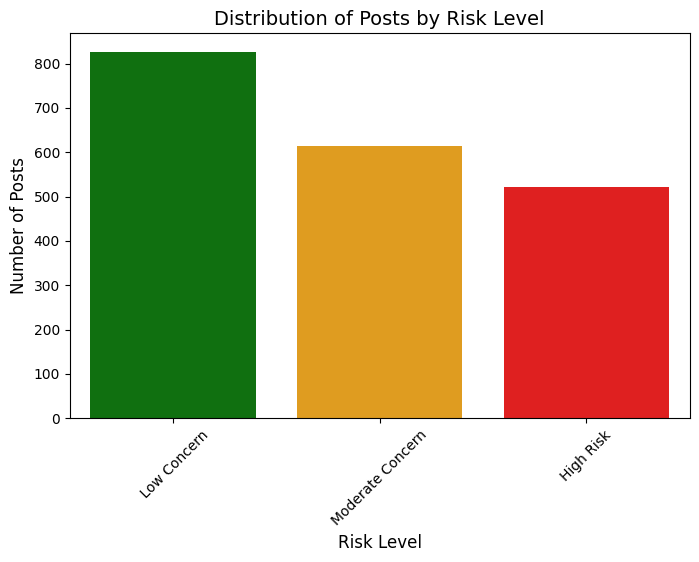

In [20]:
risk_counts=df['Risk Level'].value_counts()

# plot the bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=risk_counts.index,y=risk_counts.values,palette=["green", "orange", "red"])

# add labels and ttile
plt.xlabel("Risk Level",fontsize=12)
plt.ylabel("Number of Posts",fontsize=12)
plt.title("Distribution of Posts by Risk Level",fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [21]:
!pip install geopy folium spacy plotly
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 87.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [22]:
import pandas as pd
import spacy
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [23]:
nlp=spacy.load("en_core_web_sm")
geolocator=Nominatim(user_agent="geo-locator")
def extract_location(text):
  doc=nlp(text)
  for ent in doc.ents:
    if ent.label_=="GPE":
      return ent.text
  return None





In [24]:
# Apply location extraction
df["Location"] = df["Content"].apply(extract_location)

In [25]:
df[['Content','Location']].head(10)

,Content,Location
0,dont get wrong better dontleavemybedforaweek d...,None
1,years old man exactly,None
2,read lot posts people struggling daily debilit...,None
3,dont know makes sense mean stay late possible ...,None
4,cant even remember last time woke excited anyt...,None
5,happens lot cooking walking class brushing tee...,None
6,like posted askreddit asking nondepressed peop...,None
7,cant imagine many days wasted sad crying able ...,None
8,feels like harder try better harder pushes back,None
9,know issues go manic mood swings depressive en...,None


In [26]:
location_df=df['Location'].value_counts()

In [27]:
location_df

,count
Location,
us,18
hernia,8
homura,8
gaza,8
mexico,8
los angeles,3
maryg,3
dallas,3
httpswwwamazoncomsubtleartnotgivingcounterintuitivedpbiyrefsrsbooksieutfqidsrkeywordsthesubtleartofnotgivingaf,2


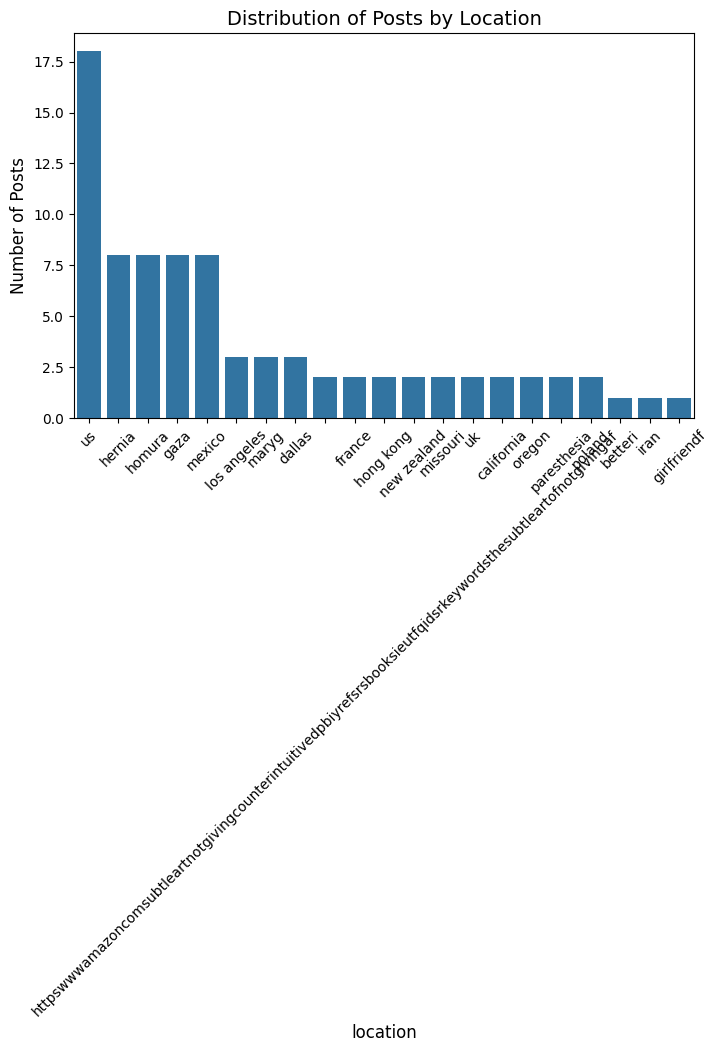

In [28]:
location_counts=df['Location'].value_counts()

# plot the bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=location_counts.index,y=location_counts.values)

# add labels and ttile
plt.xlabel("location",fontsize=12)
plt.ylabel("Number of Posts",fontsize=12)
plt.title("Distribution of Posts by Location",fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [29]:
main_df=df

In [30]:
main_df.shape

(1963, 14)

In [31]:
main_df.head()

,Post ID,Subreddit,Timestamp,Title,Content,Upvotes,Comments,Shares,VADER_Sentiment_title,TextBlob Sentiment_title,VADER_Sentiment_content,TextBlob Sentiment_content,Risk Level,Location
0,cd0hjp,depression,2019-07-14 07:53:40,shout particular hell functional depression,dont get wrong better dontleavemybedforaweek d...,6678,346,0,Negative,Positive,Negative,Negative,Moderate Concern,None
1,ccaxvm,depression,2019-07-12 13:36:38,years ago someone told years would routinely s...,years old man exactly,4421,218,0,Negative,Positive,Neutral,Positive,Low Concern,None
2,dpl4bu,depression,2019-10-31 09:36:19,highfunctioning depression feel like im living...,read lot posts people struggling daily debilit...,4088,349,0,Negative,Neutral,Negative,Negative,Moderate Concern,None
3,b5lw5z,depression,2019-03-26 05:40:19,anyone else stay super late avoid next day,dont know makes sense mean stay late possible ...,3924,208,0,Positive,Positive,Negative,Positive,Moderate Concern,None
4,cn5vlj,depression,2019-08-07 13:35:42,worst part depression waking first thought pop...,cant even remember last time woke excited anyt...,3629,183,0,Negative,Negative,Positive,Positive,Moderate Concern,None


In [32]:
location_df=df

In [33]:
location_df.shape

(1963, 14)

In [34]:
location_df.head()

,Post ID,Subreddit,Timestamp,Title,Content,Upvotes,Comments,Shares,VADER_Sentiment_title,TextBlob Sentiment_title,VADER_Sentiment_content,TextBlob Sentiment_content,Risk Level,Location
0,cd0hjp,depression,2019-07-14 07:53:40,shout particular hell functional depression,dont get wrong better dontleavemybedforaweek d...,6678,346,0,Negative,Positive,Negative,Negative,Moderate Concern,None
1,ccaxvm,depression,2019-07-12 13:36:38,years ago someone told years would routinely s...,years old man exactly,4421,218,0,Negative,Positive,Neutral,Positive,Low Concern,None
2,dpl4bu,depression,2019-10-31 09:36:19,highfunctioning depression feel like im living...,read lot posts people struggling daily debilit...,4088,349,0,Negative,Neutral,Negative,Negative,Moderate Concern,None
3,b5lw5z,depression,2019-03-26 05:40:19,anyone else stay super late avoid next day,dont know makes sense mean stay late possible ...,3924,208,0,Positive,Positive,Negative,Positive,Moderate Concern,None
4,cn5vlj,depression,2019-08-07 13:35:42,worst part depression waking first thought pop...,cant even remember last time woke excited anyt...,3629,183,0,Negative,Negative,Positive,Positive,Moderate Concern,None


In [35]:
location_df=location_df.dropna(subset=['Location'])

In [37]:
location_df.shape

(82, 14)

In [38]:
# Initialize geocoder
geolocator = Nominatim(user_agent="geo_locator")

In [39]:
# Get latitude and longitude for each location
def get_coordinates(place):
    try:
        location = geolocator.geocode(place)
        if location:
            return (location.latitude, location.longitude)
    except:
        return None

In [40]:
location_df["Coordinates"] = location_df["Location"].apply(get_coordinates)
location_df = location_df.dropna(subset=["Coordinates"])

<ipython-input-40-0cf25aed7c51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df["Coordinates"] = location_df["Location"].apply(get_coordinates)


In [41]:
location_df["Coordinates"]

,Coordinates
29,"(32.51149573617983, -110.8438606392588)"
46,"(19.4326296, -99.1331785)"
50,"(39.7837304, -100.445882)"
66,"(46.8986335, 142.7425074)"
85,"(-23.328398, 32.8066057)"
...,...
1904,"(6.3110548, 20.5447525)"
1909,"(36.7014631, -118.755997)"
1919,"(45.9202311, 10.0515779)"
1939,"(52.215933, 19.134422)"


In [42]:
# Extract latitudes and longitudes
location_df["Latitude"] = location_df["Coordinates"].apply(lambda x: x[0])
location_df["Longitude"] = location_df["Coordinates"].apply(lambda x: x[1])

In [43]:
# Display top 5 locations with the most crisis discussions
top_locations =location_df["Location"].value_counts().head(5)
print("Top 5 locations with highest crisis discussions:\n", top_locations)

Top 5 locations with highest crisis discussions:
 Location
us        18
hernia     8
mexico     8
homura     8
gaza       8
Name: count, dtype: int64


In [44]:
# Create a heatmap of crisis posts
m = folium.Map(location=[location_df["Latitude"].mean(), location_df["Longitude"].mean()], zoom_start=5)
heat_data = list(zip(location_df["Latitude"], location_df["Longitude"]))
HeatMap(heat_data).add_to(m)
m.save("crisis_heatmap.html")

In [46]:
# Create an interactive scatter plot
fig = px.scatter_mapbox(location_df, lat="Latitude", lon="Longitude", hover_name="Location",
                        color="Risk Level", size_max=15, zoom=3,
                        mapbox_style="open-street-map")
fig.show()